# 读取uniref90数据库

In [40]:
from Bio import SeqIO

filename = '/geniusland/home/liuxianliang1/data/uniref90/uniref90.fasta'
iterator = SeqIO.parse(filename,'fasta')

seqs = []
for record in iter(iterator):
    seqs.append(record)


# 读取优化结果

In [41]:
f = open('result_acthr.txt','r')
data = f.readlines()
peps = {}
count = 0
for line in data:
    split = line.split('\t')
    if len(split) > 1:
        count += 1
        peps[split[1]] = split[0]

In [42]:
print(count)
print(len(peps))

410
276


# 新颖性分析

In [43]:
for key in peps.keys():
    for i in range(len(seqs)):
        if key == seqs[i].seq:
            print(key)


VLPLISMALGKLL
FLIGMTQGLICLITRKC
RVCYAIPLPICY
GLFDVIKKVASVIGGL


# 多样性分析

In [48]:
f = open('result_acthr.txt','r')
data = f.readlines()
print(len(data))
origin = []
peps = []
for i in range(11):
    split = data[i].split('\t')
    if len(split) > 1:
        origin.append(split[1])
for i in range(11, 452):
    split = data[i].split('\t')
    if len(split) > 1:
        peps.append(split[1])

452


In [52]:
import numpy as np
mutation_num = np.zeros(400)
for i in range(10):
    for j in range(0, 400, 10):
        min_len = len(origin[i])
        if min_len > len(peps[j+i]):
            min_len = len(peps[j+i])
        nums = 0
        for k in range(min_len):
            if origin[i][k] != peps[j+i][k]:
                nums += 1
        for k in range(min_len, len(peps[j+i])):
            nums += 1
        mutation_num[j+i] = nums + abs(len(origin[i])-len(peps[j+i]))
           

In [53]:
mutation_num

array([ 1.,  5.,  1.,  1.,  0.,  5.,  0.,  0.,  0.,  0.,  2.,  4.,  1.,
        1.,  1.,  6.,  3.,  1.,  0.,  0.,  3.,  5.,  3.,  3.,  1.,  7.,
        4.,  1.,  0.,  1.,  4.,  5.,  3.,  5.,  1.,  9.,  4.,  3.,  1.,
        2.,  3.,  5.,  4.,  5.,  2.,  8.,  5.,  4.,  1.,  2.,  3.,  4.,
        5.,  5.,  3.,  9.,  5.,  4.,  1.,  2.,  3.,  4.,  4.,  5.,  3.,
        9.,  6.,  4.,  2.,  3.,  5.,  8.,  6.,  6.,  3.,  8.,  6.,  3.,
        4.,  5.,  5.,  8.,  6.,  8.,  3., 10.,  7.,  5.,  4.,  6.,  3.,
        9.,  6.,  9.,  3., 10.,  6.,  6.,  5.,  6.,  4.,  9.,  8.,  9.,
        3.,  8.,  7.,  7.,  6.,  6.,  4., 11.,  9., 10.,  4.,  9.,  8.,
       11.,  6.,  8.,  5., 12.,  9., 11.,  4.,  7.,  8., 11.,  7.,  8.,
        6., 12.,  9., 10.,  4.,  9.,  8., 12.,  7., 10.,  7., 12.,  9.,
       10.,  4., 10.,  8., 12.,  7., 11.,  8., 13.,  9.,  9.,  4., 10.,
        8., 13.,  7., 10.,  9., 13., 12.,  9.,  4., 10.,  8., 13.,  8.,
        9.,  9., 13., 13.,  9.,  6., 13.,  9., 14.,  8., 11.,  9

# 结合亲和力分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st 

### 结合能量（由HPEPDOCK计算）

#### CXCR4

In [33]:
y_data = []
a = np.array([-321.99, -251.35, -258.33, -300.57, -290.73, -248.30, -266.54, -246.13, -264.74, -236.81, -259.62, -258.15, -287.53, -268.77, -269.00, -261.40, -260.89, -276.07, -265.85, -300.69])
b = np.array([-233.04, -257.73, -229.13, -235.50, -229.48, -238.79, -237.61, -270.71, -271.79, -270.28, -264.63])
c = np.array([-212.12, -225.25, -273.48, -235.54, -235.09, -239.20, -237.32, -233.59, -247.66, -248.86, -238.80, -219.89, -249.98, -241.12, -252.39, -237.08, -240.79, -233.32, -243.68, -241.25])
d = np.array([-271.11,-262.82,-260.78,-278.14,-261.16,-274.25,-251.54,-247.32,-305.60,-244.24,-264.64,-263.28,-270.99,-250.45,-230.17,-230.17,-252.24,-254.78,-255.98,-258.83,-257.93,-259.84,-310.62])
e = np.array([-197.72,-197.80,-216.93,-202.76,-201.09,-210.12])
f = np.array([-281.04,-306.93,-236.82,-291.77,-290.52,-303.11,-301.72,-285.05,-288.01,-274.23,-285.48,-304.62,-296.87,-280.75,-305.23,-288.38,-287.25,-291.77,-286.75,-285.36,-285.88,-275.73,-254.64,-238.49,-271.18,-276.52,-258.87,-264.33,-270.84,-265.55,-285.20,-282.96,-283.77,-282.50,-254.70,-261.78,-283.70])
g = np.array([-269.08,-242.11,-251.19,-246.03,-251.20,-295.52,-260.81,-274.43,-289.30,-266.26,-237.49,-265.39,-261.57,-269.76,-268.33,-273.86,-295.39,-267.56,-250.19,-256.33,-257.01,-250.42])
h = np.array([-241.35,-252.09,-235.14,-245.26,-265.35,-251.66,-235.65,-231.90,-243.73,-251.79,-245.87,-263.60,-231.98,-294.26,-276.80,-246.86,-247.55,-249.26])
i = np.array([-239.89,-219.36,-231.12,-232.74])
j = np.array([-233.61,-232.94,-231.11,-237.84,-222.03,-234.26,-257.85,-228.84])
y_data.append(a)
y_data.append(b)
y_data.append(c)
y_data.append(d)
y_data.append(e)
y_data.append(f)
y_data.append(g)
y_data.append(h)
y_data.append(i)
y_data.append(j)

In [34]:
jitter = 0.08
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

In [35]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3", "#30849D", "#A99D3F", "#6F1342", "#D5E521", "#931B7F", "#6193C8", "#1B1998"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Horizontal lines
# HLINES = [40, 50, 60]

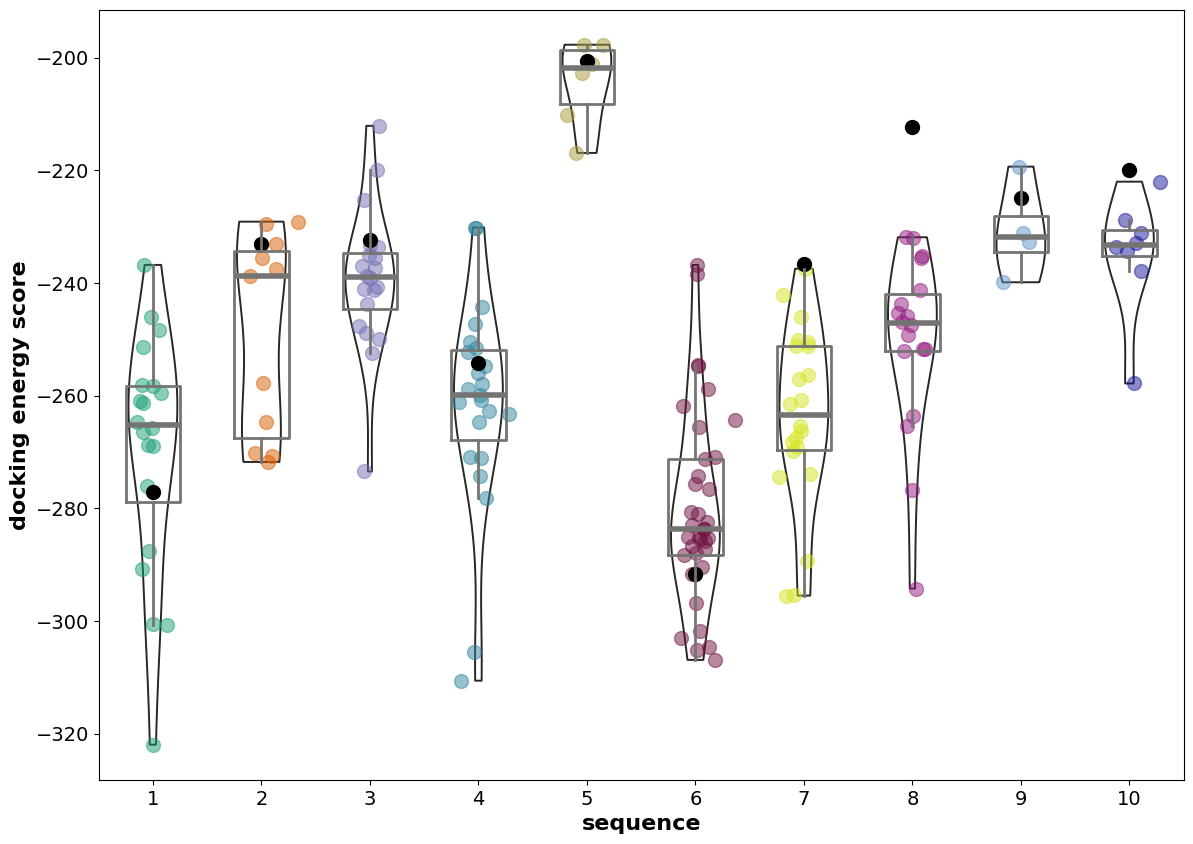

In [36]:
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
# fig.patch.set_facecolor("white")
# ax.set_facecolor("white")

# Horizontal lines that are used as scale reference
# for h in HLINES:
#     ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)


ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

xlabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels)
plt.tick_params(labelsize=14)
# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.5)
ax.scatter(0, -277.15, s = 100, color='#000000', alpha=1.0)
ax.scatter(1, -233.13, s = 100, color='#000000', alpha=1.0)
ax.scatter(2, -232.37, s = 100, color='#000000', alpha=1.0)
ax.scatter(3, -254.20, s = 100, color='#000000', alpha=1.0)
ax.scatter(4, -200.55, s = 100, color='#000000', alpha=1.0)
ax.scatter(5, -291.70, s = 100, color='#000000', alpha=1.0)
ax.scatter(6, -236.62, s = 100, color='#000000', alpha=1.0)
ax.scatter(7, -212.31, s = 100, color='#000000', alpha=1.0)
ax.scatter(8, -224.98, s = 100, color='#000000', alpha=1.0)
ax.scatter(9, -219.98, s = 100, color='#000000', alpha=1.0)
ax.set_ylabel('docking energy score', size=16, weight="bold")
ax.set_xlabel('sequence', size=16, weight="bold")
fig.savefig('docking_scores_cxcr4.svg')


#### ACTHR

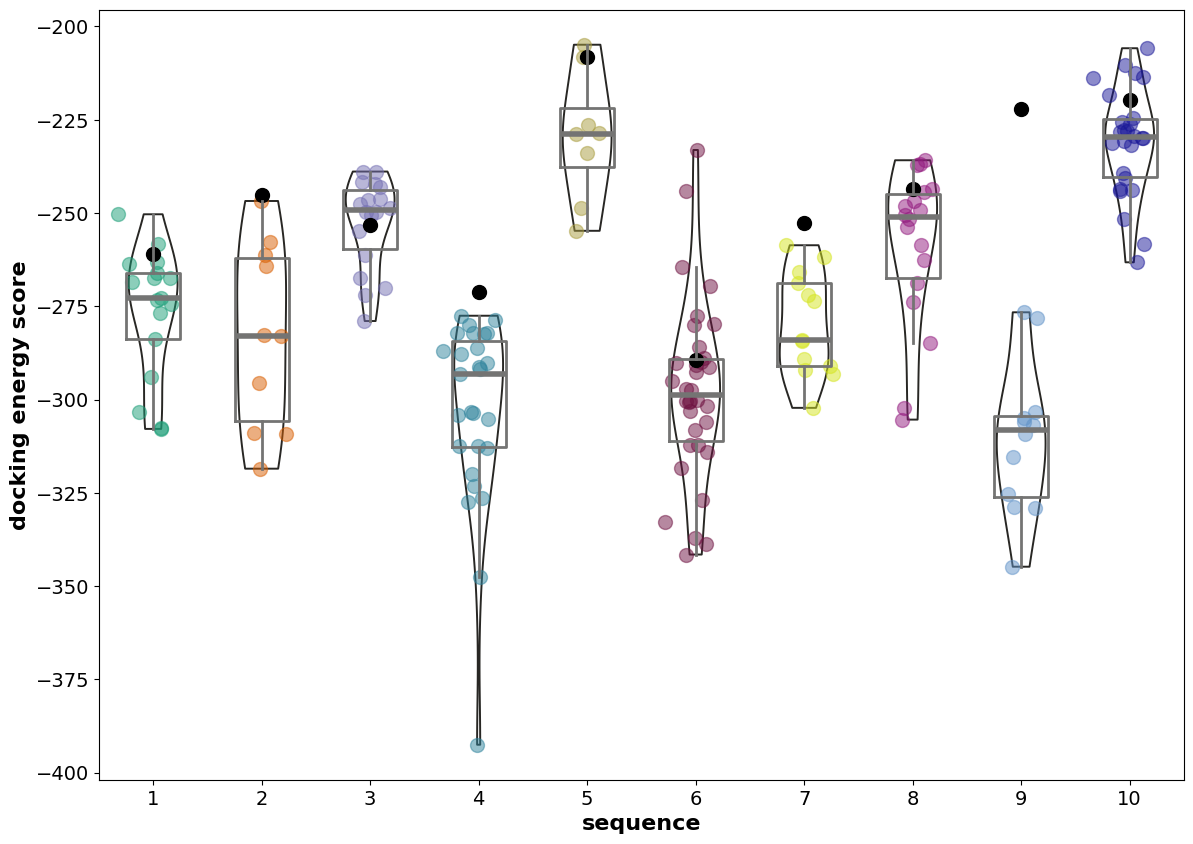

In [37]:
y_data = []
a = np.array([-263.04, -267.41, -250.34, -293.92, -274.28, -307.86, -267.43, -276.88, -263.56, -268.58, -272.86, -283.76, -307.59, -303.35, -258.18, -273.22, -266.18])
b = np.array([-257.64, -295.58, -318.52, -309.11, -309.04, -283.02, -246.78, -261.21, -282.69, -264.25])
c = np.array([-238.89, -239.03, -249.80, -242.12, -246.20, -241.59, -250.41, -272.05, -278.95, -267.41, -254.76, -246.56, -270.13, -261.38, -249.85, -248.56, -247.58, -242.96])
d = np.array([-282.08, -282.43, -291.28, -278.58, -303.50, -290.23, -293.11, -282.25, -326.26, -286.98, -313.10, -279.90, -392.50, -327.44, -323.10, -305.24, -303.44, -277.53, -287.78, -319.92, -282.26, -304.01, -286.22, -291.68, -312.46, -347.43, -312.46])
e = np.array([-208.27, -204.90, -233.93, -228.51, -254.77, -248.76, -228.94, -226.43])
f = np.array([-305.90, -290.76, -300.59, -294.95, -269.54, -233.11, -314.04, -244.02, -279.78, -300.24, -302.95, -312.17, -337.11, -338.70, -327.03, -312.26, -297.29, -285.92, -308.18, -277.60, -301.80, -297.53, -341.53, -300.50, -300.33, -290.20, -332.75, -318.21, -264.37, -288.96, -291.35, -289.86, -279.99,-292.71])
g = np.array([-265.94, -268.63, -261.92, -302.22, -290.92, -273.53, -293.17, -258.64, -271.98, -284.24, -292.01, -289.10, -283.93])
h = np.array([-253.69, -251.58, -262.64, -236.88, -244.27, -243.63, -248.00, -235.86, -237.19, -249.18, -258.60, -268.84, -246.91, -250.46, -273.92, -302.27, -305.37, -284.72])
i = np.array([-325.19, -328.95, -305.98, -309.26, -306.85, -344.79, -278.01, -328.85, -303.37, -276.61, -304.88, -315.38])
j = np.array([-251.51, -212.46, -213.46, -229.42, -205.84, -228.07, -225.69, -229.87, -230.73, -240.67, -228.27, -243.97, -224.43, -231.33, -229.77, -231.67, -210.44, -243.53, -213.84, -226.23, -218.49, -239.29, -263.21, -243.82, -258.32, -227.64])
y_data.append(a)
y_data.append(b)
y_data.append(c)
y_data.append(d)
y_data.append(e)
y_data.append(f)
y_data.append(g)
y_data.append(h)
y_data.append(i)
y_data.append(j)

jitter = 0.08
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
x_jittered

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3", "#30849D", "#A99D3F", "#6F1342", "#D5E521", "#931B7F", "#6193C8", "#1B1998"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0,1,2,3,4,5,6,7,8,9]

# Horizontal lines
# HLINES = [40, 50, 60]

fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
# for h in HLINES:
#     ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)
xlabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels)
plt.tick_params(labelsize=14)
# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.5)
ax.scatter(0, -260.94, s = 100, color='#000000', alpha=1.0)
ax.scatter(1, -245.20, s = 100, color='#000000', alpha=1.0)
ax.scatter(2, -253.16, s = 100, color='#000000', alpha=1.0)
ax.scatter(3, -271.08, s = 100, color='#000000', alpha=1.0)
ax.scatter(4, -208.13, s = 100, color='#000000', alpha=1.0)
ax.scatter(5, -289.35, s = 100, color='#000000', alpha=1.0)
ax.scatter(6, -252.67, s = 100, color='#000000', alpha=1.0)
ax.scatter(7, -243.46, s = 100, color='#000000', alpha=1.0)
ax.scatter(8, -222.06, s = 100, color='#000000', alpha=1.0)
ax.scatter(9, -219.79, s = 100, color='#000000', alpha=1.0)
ax.set_ylabel('docking energy score', size=16, weight="bold")
ax.set_xlabel('sequence', size=16, weight="bold")
fig.savefig('docking_score_acthr.svg')

# SARS-CoV-2

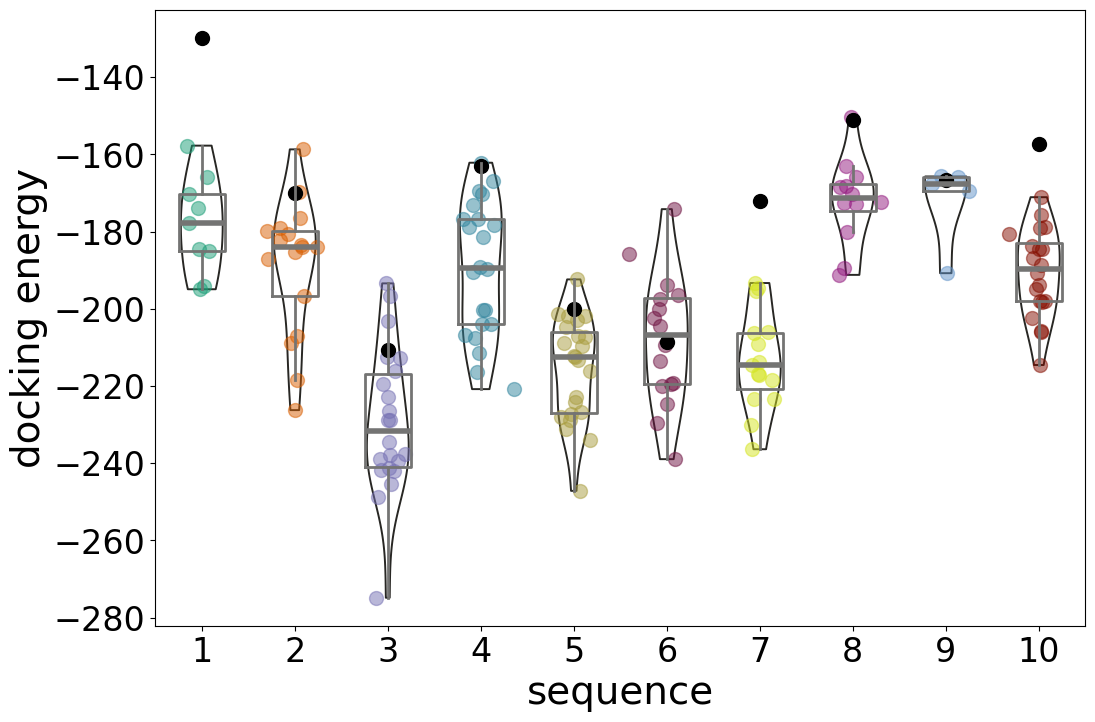

In [2]:
y_data = []
a = np.array([-170.280, -157.753, -184.493, -184.930, -177.777, -194.947, -173.903, -193.983, -165.824])
b = np.array([-218.429, -185.314, -176.517, -196.805, -206.956, -226.253, -208.923, -184.119, -158.721, -183.978, -178.958, -182.307, -187.137, -179.815, -183.403, -180.626, -169.823])
c = np.array([-222.982, -237.624, -241.745, -238.991, -241.353, -237.907, -228.794, -248.860, -239.455, -212.466, -228.897, -234.612, -242.119, -196.728, -193.429, -203.248, -219.500, -212.755, -216.077, -245.372, -274.841, -226.454])
d = np.array([-181.396, -206.851, -189.230, -216.412, -190.421, -211.559, -203.894, -207.471, -189.811, -178.756, -162.177, -200.226, -200.344, -176.860, -204.074, -176.634, -173.252, -220.814, -170.341, -178.246, -166.830, -169.509])
e = np.array([-192.398, -207.372, -227.136, -212.443, -207.132, -201.899, -201.306, -212.122, -202.983, -216.013, -204.809, -201.801, -224.213, -233.951, -222.793, -213.231, -208.766, -228.794, -227.980, -231.138, -226.742, -209.572, -247.165])
f = np.array([-185.912, -174.204, -197.586, -204.542, -229.670, -224.625, -213.510, -193.726, -219.410, -200.169, -209.301, -202.390, -196.505, -219.229, -220.000, -238.954])
g = np.array([-193.339, -206.122, -206.239, -223.340, -214.538, -223.392, -217.097, -213.674, -230.125, -195.526, -194.667, -216.894, -236.382, -209.208, -218.353])
h = np.array([-170.324, -165.963, -180.164, -189.549, -191.226, -172.658, -172.818, -172.318, -163.020, -168.298, -168.454, -150.224])
i = np.array([-165.925, -169.628, -190.787, -167.687, -165.737])
j = np.array([-188.566, -214.570, -205.69, -190.808, -197.914, -180.619, -175.675, -202.463, -178.859, -206.017, -183.861, -194.844, -186.935, -171.107, -193.785, -184.507, -178.988, -198.082, -198.159, -184.581])
y_data.append(a)
y_data.append(b)
y_data.append(c)
y_data.append(d)
y_data.append(e)
y_data.append(f)
y_data.append(g)
y_data.append(h)
y_data.append(i)
y_data.append(j)

jitter = 0.08
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
x_jittered

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3", "#30849D", "#A99D3F", "#6F1342", "#D5E521", "#931B7F", "#6193C8", "#850e00"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0,1,2,3,4,5,6,7,8,9]

# Horizontal lines
# HLINES = [40, 50, 60]

params = {
    'axes.labelsize': 24,
    'axes.titlesize':24,
    'font.size': 24, 
    'legend.fontsize': 24,
    'xtick.labelsize': 24, 
    'ytick.labelsize': 24,
}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize= (12, 8))

# Some layout stuff ----------------------------------------------
# Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
# for h in HLINES:
#     ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)
xlabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels)
# plt.tick_params(labelsize=14)
# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.5)
ax.scatter(0, -129.805, s = 100, color='#000000', alpha=1.0)
ax.scatter(1, -170.092, s = 100, color='#000000', alpha=1.0)
ax.scatter(2, -210.690, s = 100, color='#000000', alpha=1.0)
ax.scatter(3, -163.123, s = 100, color='#000000', alpha=1.0)
ax.scatter(4, -199.988, s = 100, color='#000000', alpha=1.0)
ax.scatter(5, -208.581, s = 100, color='#000000', alpha=1.0)
ax.scatter(6, -172.153, s = 100, color='#000000', alpha=1.0)
ax.scatter(7, -151.220, s = 100, color='#000000', alpha=1.0)
ax.scatter(8, -166.577, s = 100, color='#000000', alpha=1.0)
ax.scatter(9, -157.290, s = 100, color='#000000', alpha=1.0)
ax.set_ylabel('docking energy', size=28)
ax.set_xlabel('sequence', size=28)
fig.savefig('figure/docking_score_sars-cov-2.pdf')

### 结合分数（由CAMP计算）

#### CXCR4

In [38]:
f = open('result_cxcr4.txt','r')
data = f.readlines()
peps = []
scores = []
count = 0
for line in data:
    split = line.split('\t')
    if len(split) > 1:
        count += 1
        peps.append(split[2].strip('\n'))
for i in range(10, 20):
    for j in range(i, 410, 10):
        scores.append(float(peps[j]))

In [ ]:
y_data = []
a = np.array(scores[0:40])
b = np.array(scores[40:80])
c = np.array(scores[80:120])
d = np.array(scores[120:160])
e = np.array(scores[160:200])
f = np.array(scores[200:240])
g = np.array(scores[240:280])
h = np.array(scores[280:320])
i = np.array(scores[320:360])
j = np.array(scores[360:400])
y_data.append(a)
y_data.append(b)
y_data.append(c)
y_data.append(d)
y_data.append(e)
y_data.append(f)
y_data.append(g)
y_data.append(h)
y_data.append(i)
y_data.append(j)

jitter = 0.08
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
x_jittered

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3", "#30849D", "#A99D3F", "#6F1342", "#D5E521", "#931B7F", "#6193C8", "#1B1998"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0,1,2,3,4,5,6,7,8,9]

# Horizontal lines
# HLINES = [40, 50, 60]

fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
# for h in HLINES:
#     ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

xlabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
ax.set_xticks(POSITIONS)
# ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
ax.set_xticklabels(xlabels)
plt.tick_params(labelsize=14)
# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.5)
ax.scatter(0, 0.09502352774143219, s = 100, color='#000000', alpha=1.0)
ax.scatter(1, 0.027402019128203392, s = 100, color='#000000', alpha=1.0)
ax.scatter(2, 0.014363434165716171, s = 100, color='#000000', alpha=1.0)
ax.scatter(3, 0.0008419071673415601, s = 100, color='#000000', alpha=1.0)
ax.scatter(4, 3.3087359042838216e-05, s = 100, color='#000000', alpha=1.0)
ax.scatter(5, 0.0062368218787014484, s = 100, color='#000000', alpha=1.0)
ax.scatter(6, 5.8257786150761603e-08, s = 100, color='#000000', alpha=1.0)
ax.scatter(7, 3.649553749485168e-12, s = 100, color='#000000', alpha=1.0)
ax.scatter(8, 6.020253806582332e-08, s = 100, color='#000000', alpha=1.0)
ax.scatter(9, 0.08640395104885101, s = 100, color='#000000', alpha=1.0)
ax.set_ylabel('binding score', size=16, weight="bold")
ax.set_xlabel('sequence', size=16, weight="bold")
fig.savefig('binding_score_cxcr4.svg')

#### ACTHR

In [41]:
f = open('result_acthr.txt','r')
data = f.readlines()
peps = []
scores = []
count = 0
for line in data:
    split = line.split('\t')
    if len(split) > 1:
        count += 1
        peps.append(split[2].strip('\n'))
for i in range(10, 20):
    for j in range(i, 410, 10):
        scores.append(float(peps[j]))

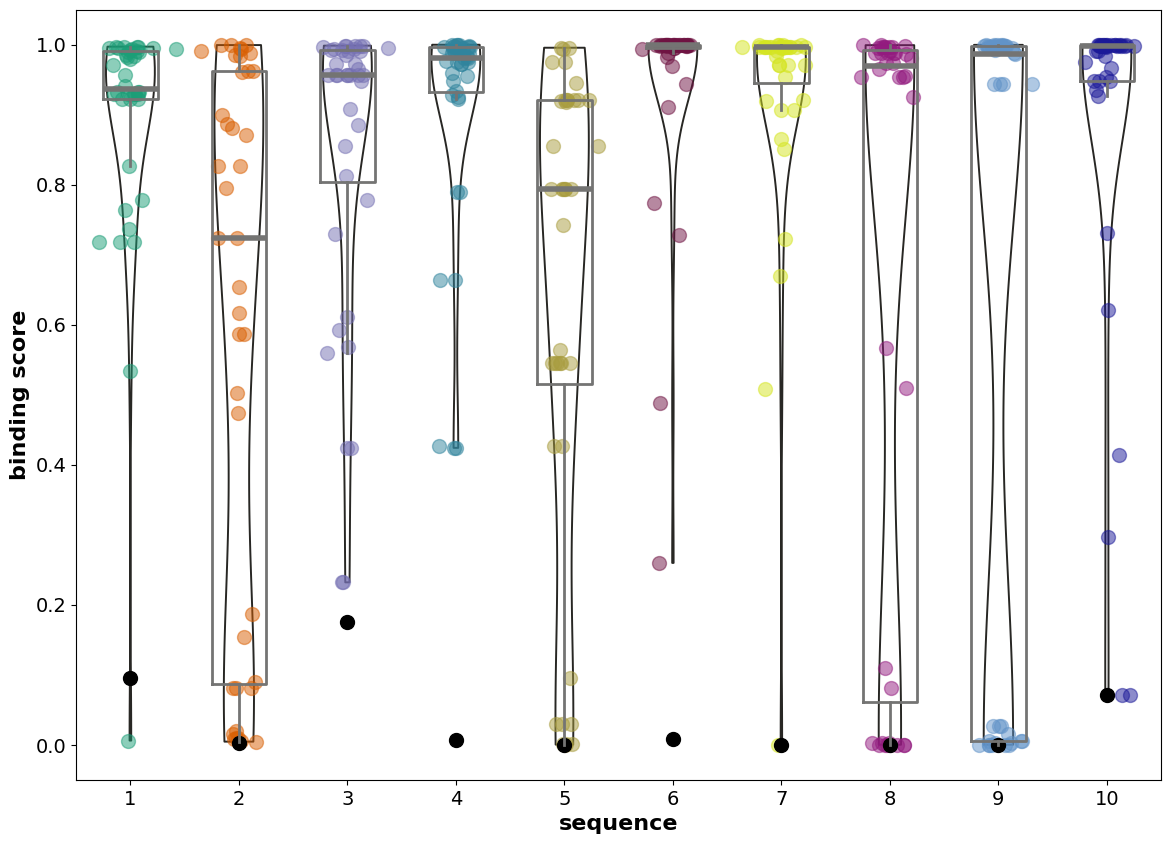

In [42]:
y_data = []
a = np.array(scores[0:40])
b = np.array(scores[40:80])
c = np.array(scores[80:120])
d = np.array(scores[120:160])
e = np.array(scores[160:200])
f = np.array(scores[200:240])
g = np.array(scores[240:280])
h = np.array(scores[280:320])
i = np.array(scores[320:360])
j = np.array(scores[360:400])
y_data.append(a)
y_data.append(b)
y_data.append(c)
y_data.append(d)
y_data.append(e)
y_data.append(f)
y_data.append(g)
y_data.append(h)
y_data.append(i)
y_data.append(j)

jitter = 0.08
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
x_jittered

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3", "#30849D", "#A99D3F", "#6F1342", "#D5E521", "#931B7F", "#6193C8", "#1B1998"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0,1,2,3,4,5,6,7,8,9]

# Horizontal lines
# HLINES = [40, 50, 60]

fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
# for h in HLINES:
#     ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

xlabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
ax.set_xticks(POSITIONS)
# ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
ax.set_xticklabels(xlabels)
plt.tick_params(labelsize=14)
# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.5)
ax.scatter(0, 0.09551797062158585, s = 100, color='#000000', alpha=1.0)
ax.scatter(1, 0.0022421511821448803, s = 100, color='#000000', alpha=1.0)
ax.scatter(2, 0.17522650957107544, s = 100, color='#000000', alpha=1.0)
ax.scatter(3, 0.007051755208522081, s = 100, color='#000000', alpha=1.0)
ax.scatter(4, 0.00019017455633729696, s = 100, color='#000000', alpha=1.0)
ax.scatter(5, 0.008349443785846233, s = 100, color='#000000', alpha=1.0)
ax.scatter(6, 1.794188165149535e-06, s = 100, color='#000000', alpha=1.0)
ax.scatter(7, 2.4510892244361017e-14, s = 100, color='#000000', alpha=1.0)
ax.scatter(8, 2.1815387274415343e-09, s = 100, color='#000000', alpha=1.0)
ax.scatter(9, 0.07160238921642303, s = 100, color='#000000', alpha=1.0)
ax.set_ylabel('binding score', size=16, weight="bold")
ax.set_xlabel('sequence', size=16, weight="bold")
fig.savefig('binding_score_acthr.svg')

# Novelty and Improvement ratio

In [3]:
from Levenshtein import distance
import pandas as pd
import numpy as np

df = pd.read_csv('../results/binding/result_binding.csv',sep='\t')
id_list = df['ID'].to_list()
seq_list = df['sequence'].to_list()
binding_list = df['binding score'].to_list()

origin_seq_list = []
origin_binding_list = []
opt_seq_list = [[''] * 25 for i in range(40)]
opt_binding_list = np.zeros((40,25))

for i in range(25):
    origin_seq_list.append(seq_list[i])
    origin_binding_list.append(binding_list[i])

novelty_list = []
better_list = []

for i in range(40):
    for j in range(25):
        opt_seq_list[i][j] = seq_list[25*(i+1)+j]
        opt_binding_list[i][j] = binding_list[25*(i+1)+j]

for i in range(40):
    k = 0
    count = 0
    temp_dist = 0
    for j in range(25):
        temp_dist = temp_dist + distance(origin_seq_list[j], opt_seq_list[i][j])
        k = k + 1
        if opt_binding_list[i][j] > origin_binding_list[j]:
            count = count + 1

    temp_dist = temp_dist / float(k)
    novelty_list.append(temp_dist)
    better_list.append(count / 25.0)

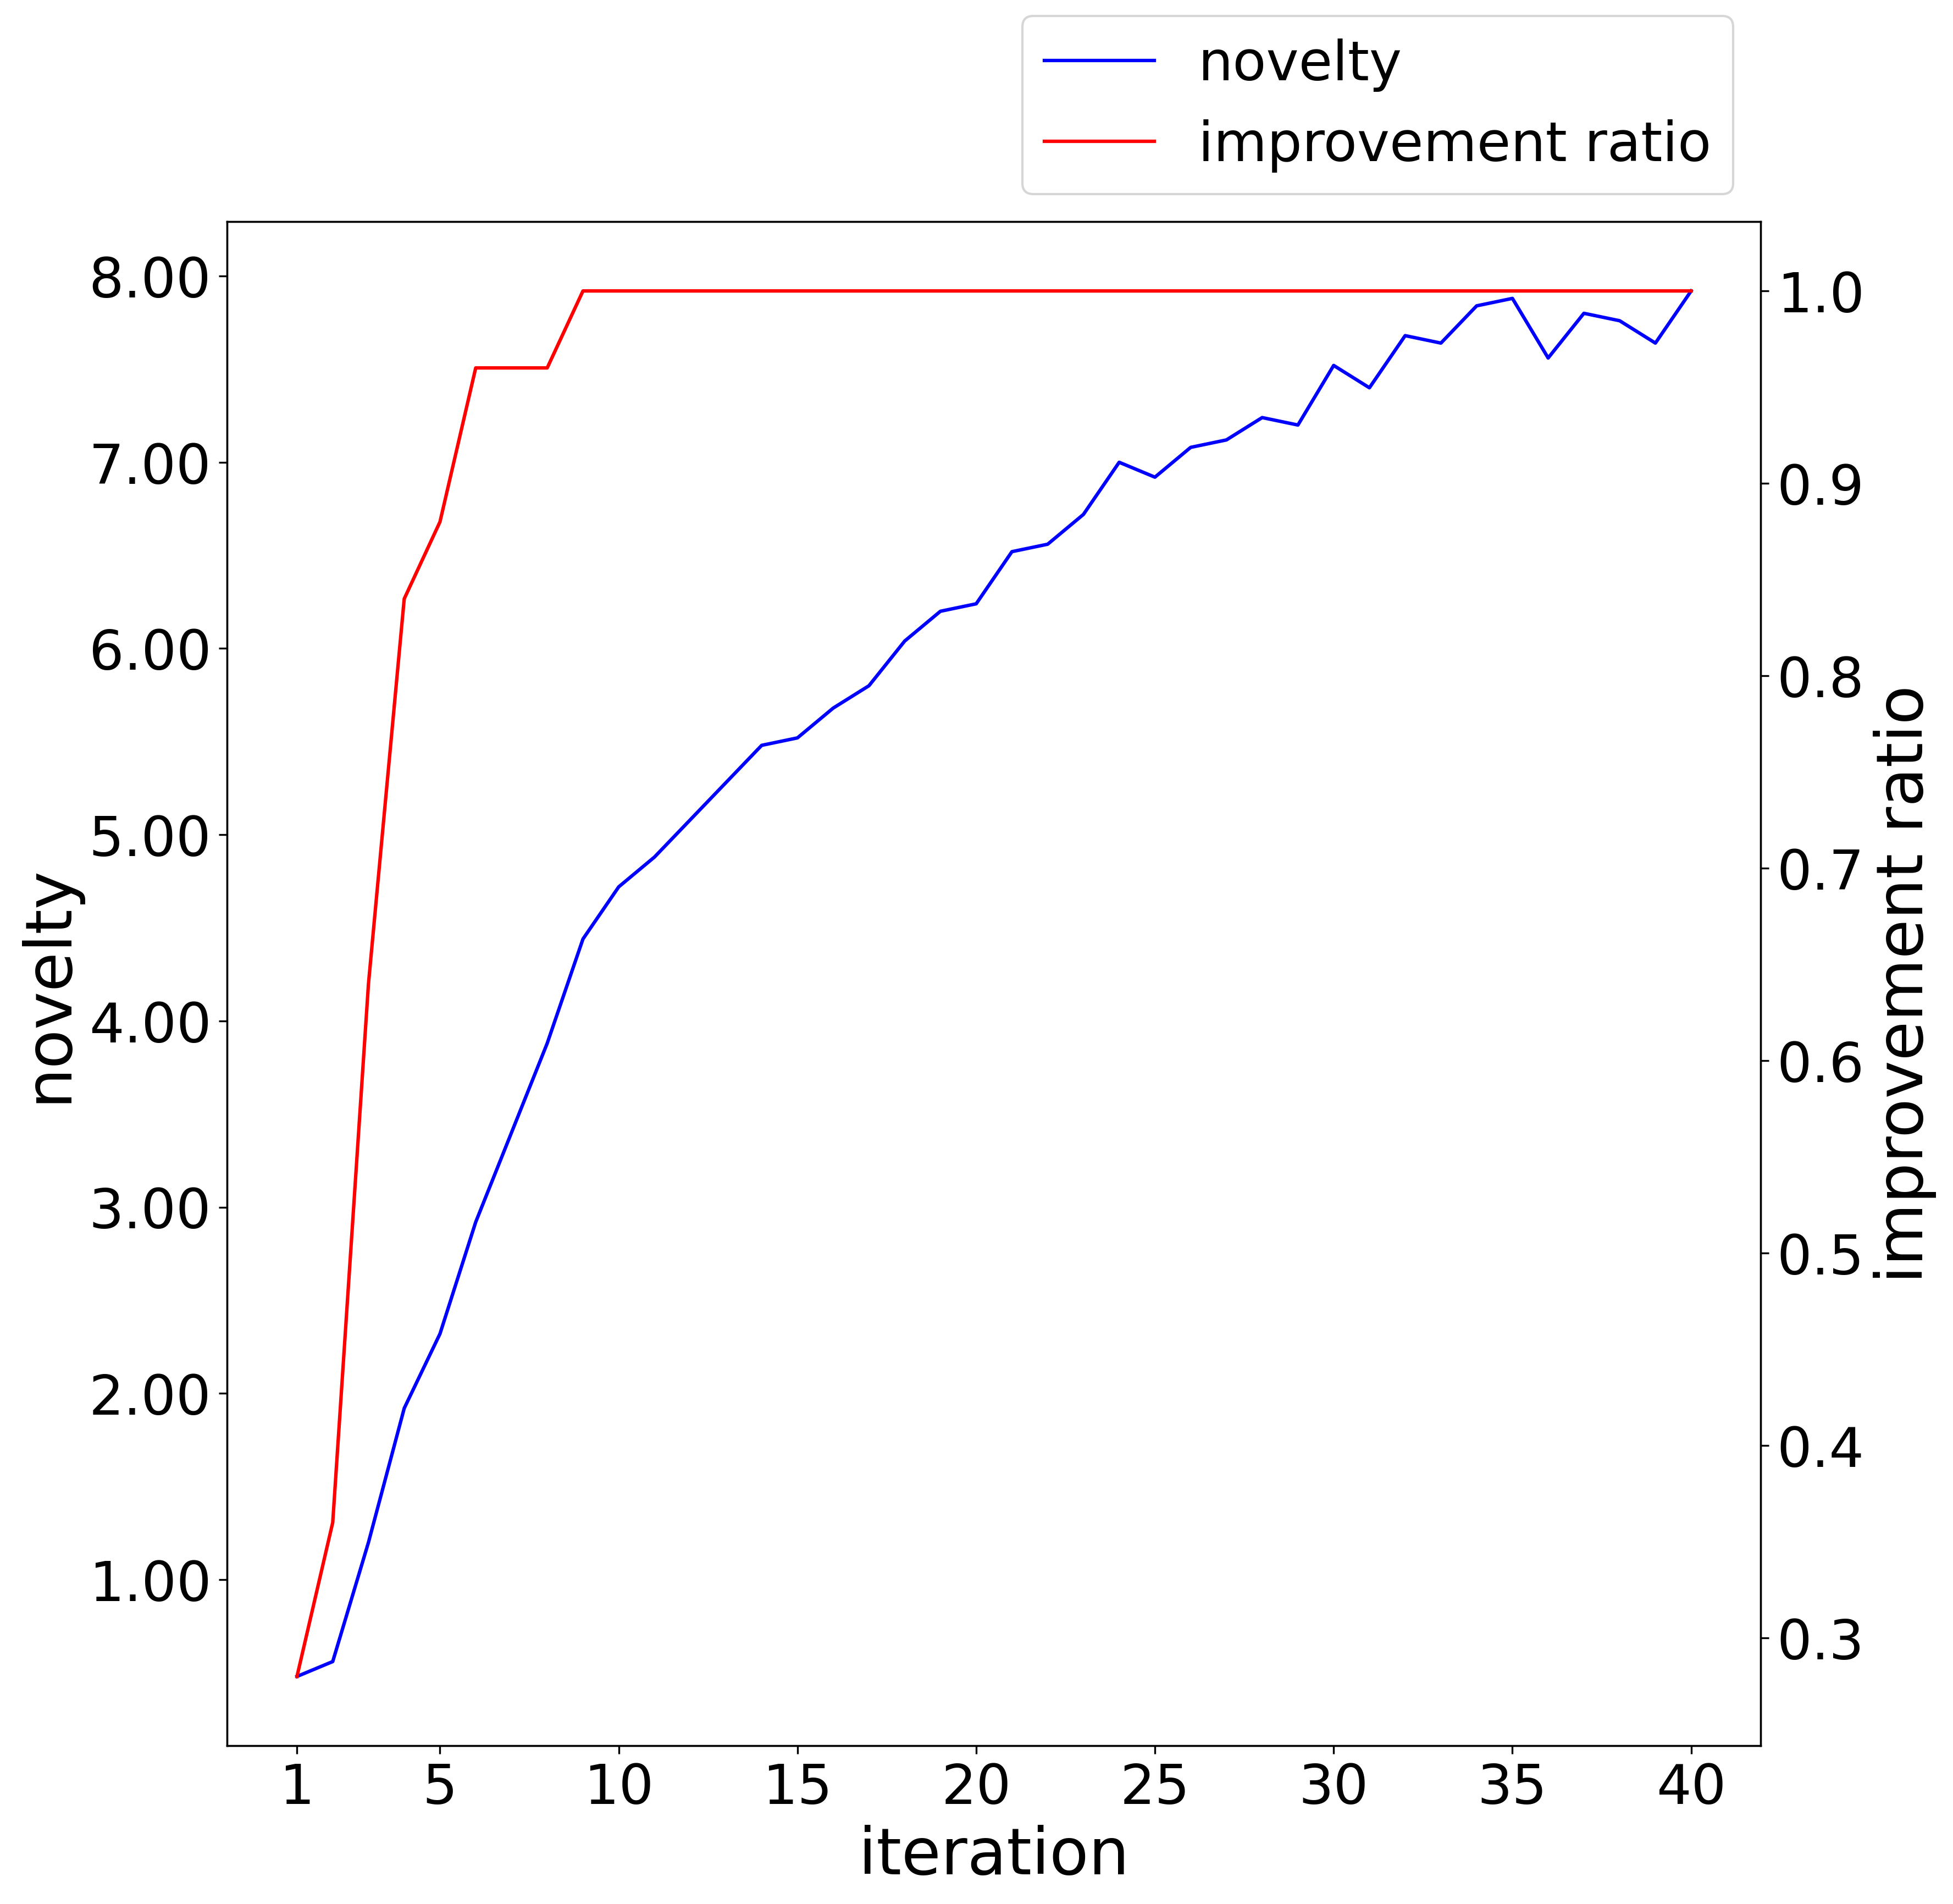

In [6]:
import numpy as np
import matplotlib.pyplot as plt
params = {
    'axes.labelsize': 24,
    'axes.titlesize':24,
    'font.size': 24, 
    'legend.fontsize': 24,
    'xtick.labelsize': 24, 
    'ytick.labelsize': 24,
}
plt.rcParams.update(params)

# plt.rcParams['font.size'] = 36
# plt.tick_params(labelsize=36)
x = np.linspace(start = 0,stop = 39, num=40)

# y1 = list(map(float, y1))
# y2 = list(map(float, y2))
fig = plt.figure(figsize=(12,12),dpi=300)
ax = fig.add_subplot(111)
ax.plot(x,novelty_list[:40], '-', label = 'novelty', color='blue')

ax.yaxis.set_major_formatter('{:.2f}'.format)
ax2 = ax.twinx()
ax2.plot(x,better_list[:40], '-r', label = 'improvement ratio', color='red')
fig.legend(loc=4, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
ax.set_xticks([0,4,9,14,19,24,29,34,39])
ax.set_xticklabels(['1','5','10','15','20','25','30','35','40'])
ax.set_xlabel("iteration", fontsize=28)
ax.set_ylabel(r"novelty", fontsize=28)
ax2.set_ylabel(r"improvement ratio",fontsize=28)
plt.savefig(f'figure/binding_novelty-improvement.pdf')